In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import json
import datetime
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Significance Test
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# NLP
import re
import nltk
from nltk.corpus import stopwords

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os 
from time import strftime 

from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression 
from sklearn import ensemble 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score

### Cleaning and importing 

In [2]:
US_vids = pd.read_csv('data/USvideos.csv')

In [3]:
US_vids

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [4]:
US_vids=US_vids.drop(['thumbnail_link','video_error_or_removed','description'], axis = 1)

In [5]:
US_vids

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,False,False
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,False,False
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,False,False
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,False,False


In [6]:
US_vids.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [7]:
US_vids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           40949 non-null  object
 1   trending_date      40949 non-null  object
 2   title              40949 non-null  object
 3   channel_title      40949 non-null  object
 4   category_id        40949 non-null  int64 
 5   publish_time       40949 non-null  object
 6   tags               40949 non-null  object
 7   views              40949 non-null  int64 
 8   likes              40949 non-null  int64 
 9   dislikes           40949 non-null  int64 
 10  comment_count      40949 non-null  int64 
 11  comments_disabled  40949 non-null  bool  
 12  ratings_disabled   40949 non-null  bool  
dtypes: bool(2), int64(5), object(6)
memory usage: 3.5+ MB


In [8]:
US_vids=US_vids.dropna()

In [9]:
for column in US_vids.columns:
    print(f"Values in {column} ", US_vids[column].unique()) 
    print(US_vids[column].value_counts(normalize=True))

Values in video_id  ['2kyS6SvSYSE' '1ZAPwfrtAFY' '5qpjK5DgCt4' ... '6h8QgZF5Qu4' 'mpnshdmtE2Y'
 'yz7Xq3T0YPs']
j4KvrAUjn6c    0.000733
MAjY8mCTXWk    0.000708
r-3iathMo7o    0.000708
8h--kFui1JA    0.000708
t4pRQ0jn23Q    0.000708
                 ...   
iM89vdPLbQs    0.000024
IXJhN4cOVM0    0.000024
j28Gt5_Mlo8    0.000024
Vf76O7y-7pk    0.000024
0q9Cm11d-fE    0.000024
Name: video_id, Length: 6351, dtype: float64
Values in trending_date  ['17.14.11' '17.15.11' '17.16.11' '17.17.11' '17.18.11' '17.19.11'
 '17.20.11' '17.21.11' '17.22.11' '17.23.11' '17.24.11' '17.25.11'
 '17.26.11' '17.27.11' '17.28.11' '17.29.11' '17.30.11' '17.01.12'
 '17.02.12' '17.03.12' '17.04.12' '17.05.12' '17.06.12' '17.07.12'
 '17.08.12' '17.09.12' '17.10.12' '17.11.12' '17.12.12' '17.13.12'
 '17.14.12' '17.15.12' '17.16.12' '17.17.12' '17.18.12' '17.19.12'
 '17.20.12' '17.21.12' '17.22.12' '17.23.12' '17.24.12' '17.25.12'
 '17.26.12' '17.27.12' '17.28.12' '17.29.12' '17.30.12' '17.31.12'
 '18.01.01' '18.02.

In [10]:
views = list(US_vids['views'].values)

In [11]:
Is_Successful = []
for view in list(range(0,len(US_vids))):
    if views[view] > 180000:
            Is_Successful.append(True)
    else:
            Is_Successful.append(False)
US_vids['Is Successful'] = Is_Successful

In [12]:
US_vids

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,Is Successful
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,True
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,True
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,True
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,True
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,False,False,True
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,False,False,True
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,False,False,True
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,False,False,True


In [13]:
def clean_trending_date(date):
    y,d,m = date.split('.')
    return datetime.date(int(y)+2000,int(m),int(d))

def clean_publish_time(time):
    y,m,d = time.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

In [14]:
US_vids['trending_date'] = US_vids['trending_date'].apply(clean_trending_date)
US_vids['publish_time'] = US_vids['publish_time'].apply(clean_publish_time)

In [15]:
US_vids['category_id'] = US_vids['category_id'].astype(str)

In [16]:
US_vids

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,Is Successful
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,False,False,True
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,True
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,True
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,True
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,False,False,True
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18,[none],1064798,60008,382,3936,False,False,True
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,False,False,True
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,False,False,True


In [17]:
# 
categories = []
for category in US_vids['category_id']:
    if category.__contains__('10'):
        categories.append('Music')
    elif category.__contains__('15'):
        categories.append('Pets & Animals')
    elif category.__contains__('17'):
        categories.append('Sport')
    elif category.__contains__('19'):
        categories.append('Travel & Events')
    elif category.__contains__('20'):
        categories.append('Gaming')
    elif category.__contains__('22'):
        categories.append('People & Blogs')
    elif category.__contains__('23'):
        categories.append('Comedy')
    elif category.__contains__('24'):
        categories.append('Entertainment')
    elif category.__contains__('25'):
        categories.append('News & Politics')
    elif category.__contains__('26'):
        categories.append('How-to & Style')
    elif category.__contains__('27'):
        categories.append('Education')
    elif category.__contains__('28'):
        categories.append('Science & Technology')
    elif category.__contains__('29'):
        categories.append('Non-profits & Activism')
    elif category.__contains__('43'):
        categories.append('Shows')
    elif category.__contains__('1'):
        categories.append('Film & Animation')
    elif category.__contains__('2'):
        categories.append('Cars & Vehicles')

In [18]:
US_vids['Genre']=categories

In [19]:
US_vids['Genre'].describe()

count             40949
unique               16
top       Entertainment
freq               9964
Name: Genre, dtype: object

In [20]:
US_vids

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,Is Successful,Genre
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,False,False,True,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,True,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,True,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,True,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,True,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,False,False,True,Pets & Animals
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18,[none],1064798,60008,382,3936,False,False,True,People & Blogs
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,False,False,True,Entertainment
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,False,False,True,Film & Animation


### Looking at data w/ further cleaning 

In [21]:
US_vids['tag_list'] = US_vids['tags'].astype('str').str.split('|')

In [22]:
num_of_tags = []
for number in list(range(0,len(US_vids))):
    num_of_tags.append(len(US_vids['tag_list'][number]))

In [23]:
US_vids['Number_of_Tags'] = num_of_tags

In [24]:
#US_vids.drop_duplicates(subset='video_id', inplace=True)

In [25]:
US_vids

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,Is Successful,Genre,tag_list,Number_of_Tags
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,False,False,True,People & Blogs,[SHANtell martin],1
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,True,Entertainment,"[last week tonight trump presidency, ""last wee...",4
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,True,Comedy,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""...",23
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,True,Entertainment,"[rhett and link, ""gmm"", ""good mythical morning...",27
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,True,Entertainment,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y...",14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,False,False,True,Pets & Animals,"[aarons animals, ""aarons"", ""animals"", ""cat"", ""...",14
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18,[none],1064798,60008,382,3936,False,False,True,People & Blogs,[[none]],1
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,False,False,True,Entertainment,[I gave safiya nygaard a perfect hair makeover...,24
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,False,False,True,Film & Animation,"[Black Panther, ""HISHE"", ""Marvel"", ""Infinity W...",22


In [26]:
US_vids['comments_disabled'] = US_vids['comments_disabled'].astype('object')
US_vids['ratings_disabled'] = US_vids['ratings_disabled'].astype('object')
US_vids['Genre'] = US_vids['Genre'].astype('object')
US_vids['Is Successful'] = US_vids['Is Successful'].astype('object')

In [27]:
US_vids=US_vids.drop(['tags','category_id','video_id'],axis=1)

C:\Users\kindl\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


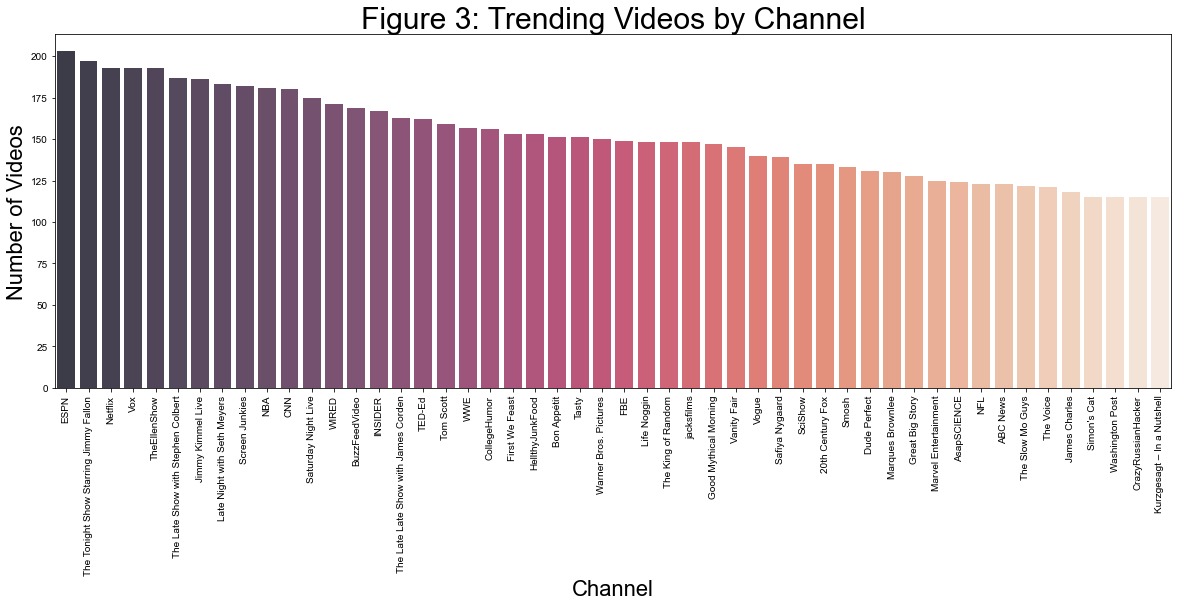

In [28]:
#Channels by videos 
channel_freq = US_vids['channel_title'].value_counts()
# Isolating the top 50 channels
channel_freq = channel_freq[0:50]
# Bar graph for number of videos for the top 50 channels
plt.figure(figsize=(20,6.5))
sns.barplot(channel_freq.index, channel_freq.values, alpha=0.8, palette="rocket")
sns.set_style("darkgrid")
sns.set(font_scale=0.9)
plt.xticks(rotation=90)
plt.xlabel('Channel', fontsize=22)
plt.ylabel('Number of Videos', fontsize=22)
plt.title('Figure 3: Trending Videos by Channel', fontsize=30)
plt.show()


### looking into categories 

In [29]:
US_vids[['views', 'likes', 'dislikes','comment_count']].agg('mean')

views            2.360785e+06
likes            7.426670e+04
dislikes         3.711401e+03
comment_count    8.446804e+03
dtype: float64

In [30]:
US_vids[['views', 'likes', 'dislikes','comment_count']].value_counts()

views    likes   dislikes  comment_count
4867281  86356   10524     3122             2
168135   4399    201       2598             2
8289563  408385  10966     21837            2
1184518  47657   1678      2405             2
3513129  106481  6922      18647            2
                                           ..
1268825  88497   811       14410            1
1268810  57366   1866      4782             1
1268790  117960  996       11624            1
1268490  49438   1728      2462             1
549      9       0         5                1
Length: 40878, dtype: int64

C:\Users\kindl\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


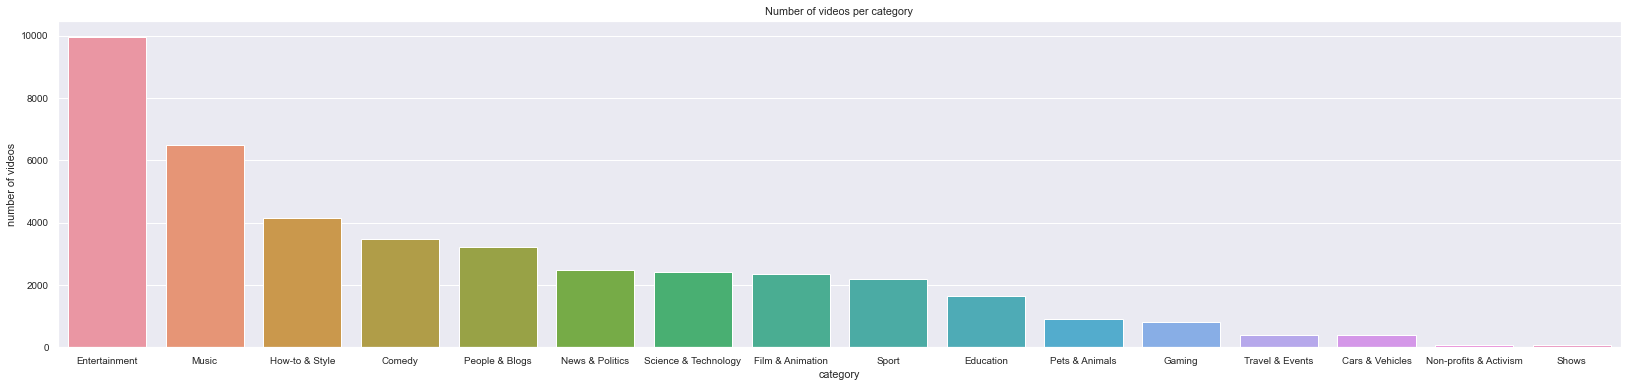

In [31]:
nb_videos_per_category = US_vids['Genre'].value_counts()
plt.figure(figsize=(28,6))
sns.barplot(nb_videos_per_category.index, nb_videos_per_category.values)
plt.title('Number of videos per category')
plt.xlabel('category')
plt.ylabel('number of videos')
plt.show()

In [32]:
US_vids.groupby('Genre')['likes'].sum()

Genre
Cars & Vehicles              4245656
Comedy                     216346746
Education                   49257772
Entertainment              530516491
Film & Animation           165997476
Gaming                      69038284
How-to & Style             162880075
Music                     1416838584
News & Politics             18151033
Non-profits & Activism      14815646
People & Blogs             186615999
Pets & Animals              19370702
Science & Technology        82532638
Shows                        1082639
Sport                       98621211
Travel & Events              4836246
Name: likes, dtype: int64

C:\Users\kindl\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


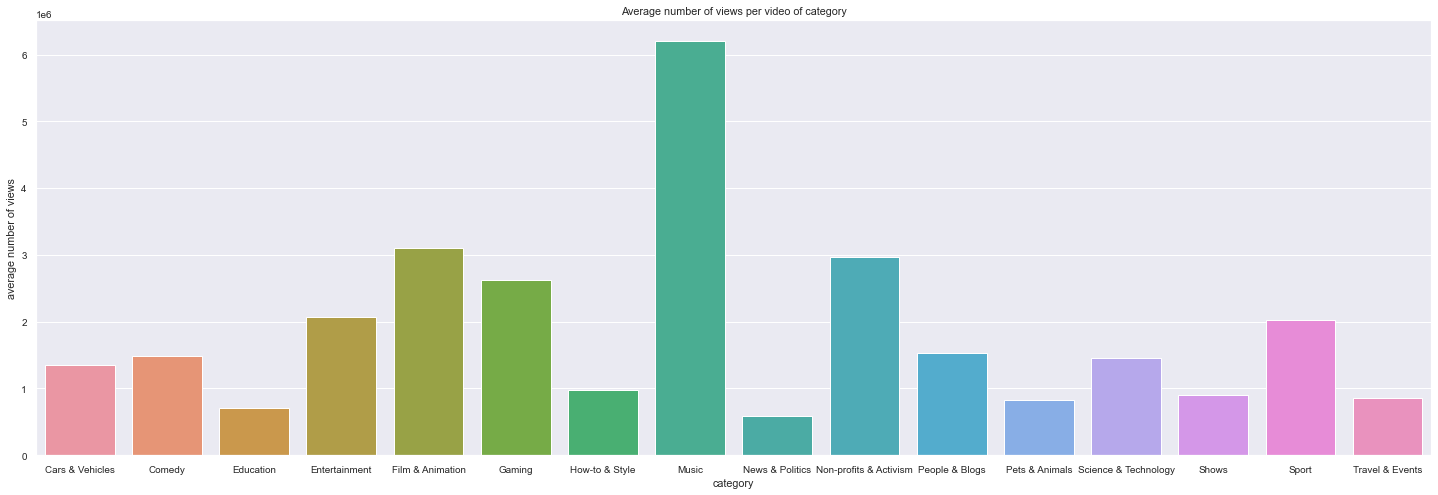

C:\Users\kindl\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


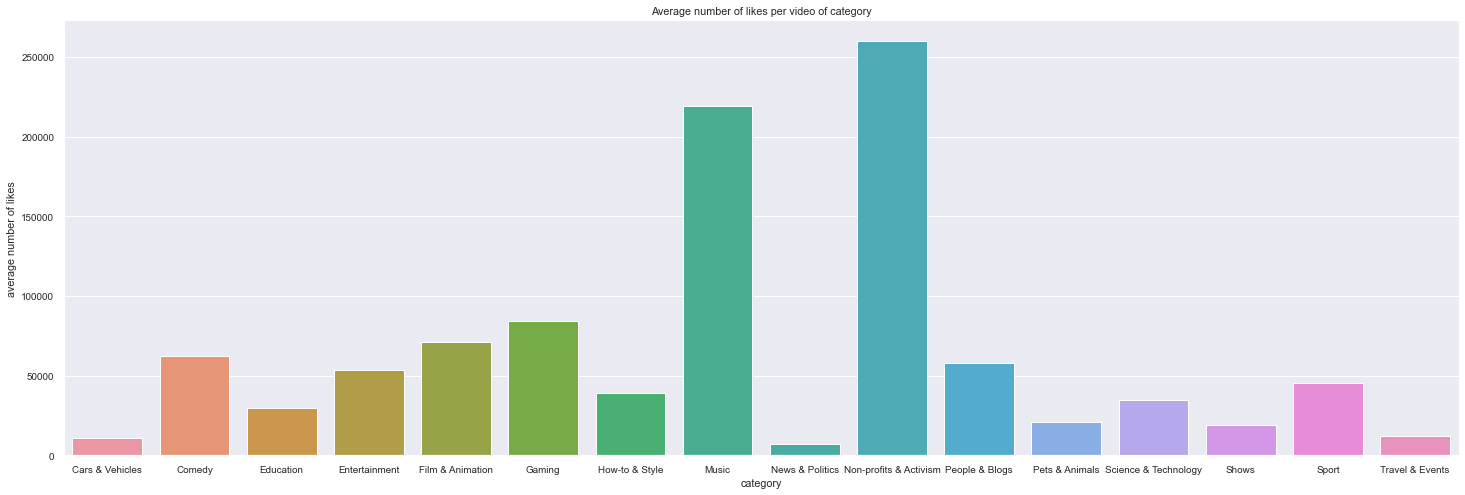

C:\Users\kindl\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


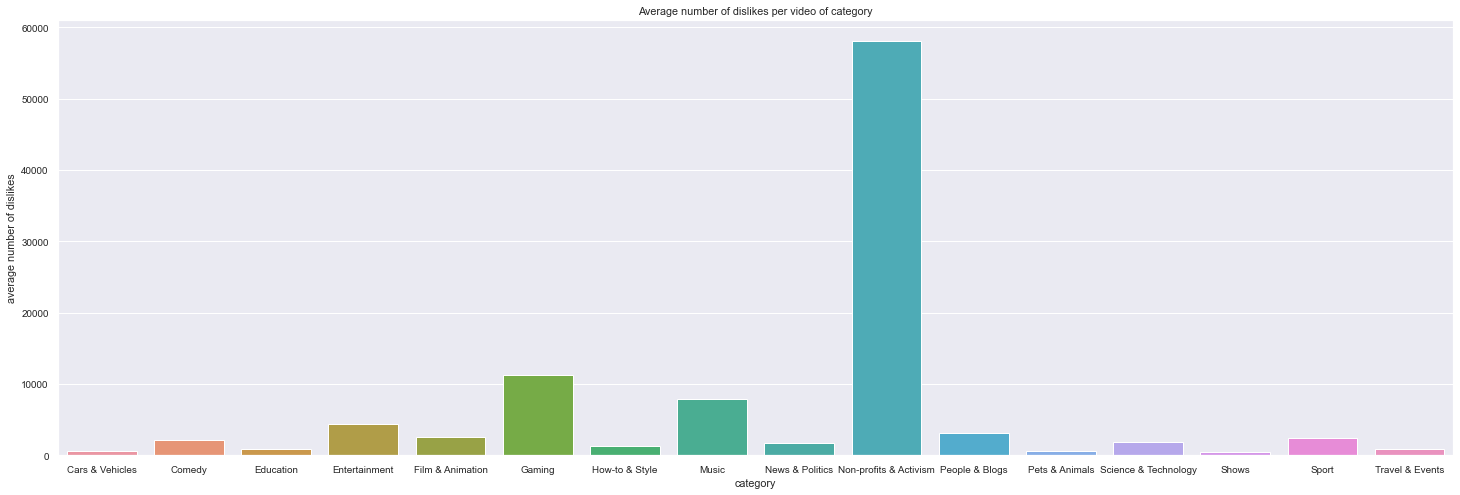

C:\Users\kindl\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


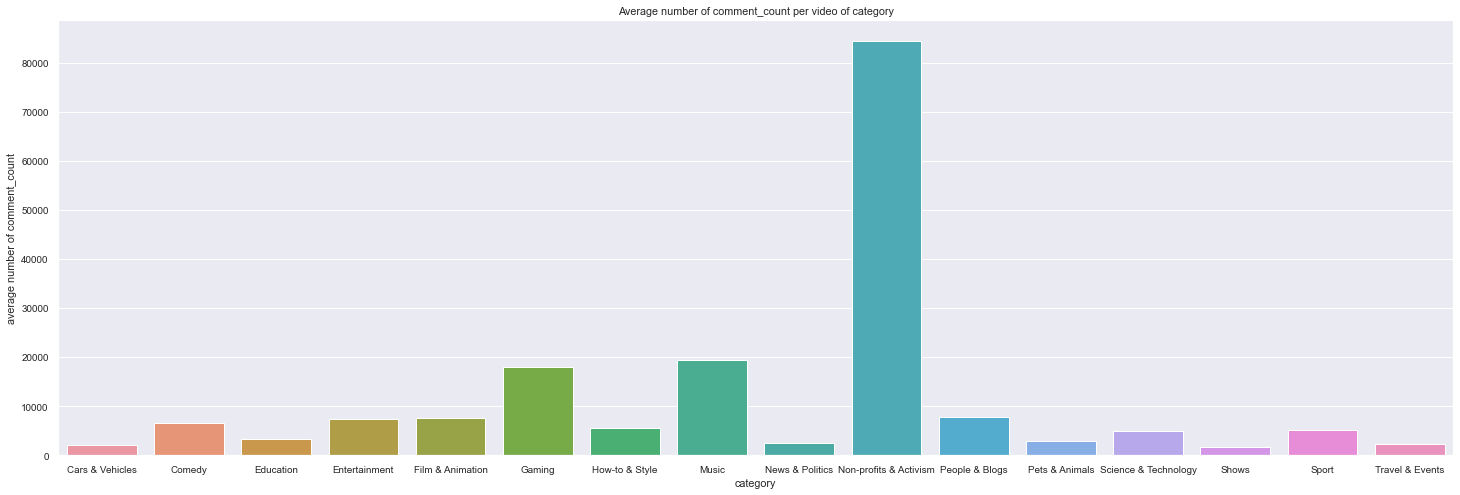

In [33]:
#0-1,400,000
#non-profit and activism has the most likes but also the most dislikes 
#music has the highest average number of viewers
features = ['views','likes', 'dislikes', 'comment_count']
for feat in features:
    avg_nb_per_category = US_vids.groupby('Genre')[feat].sum().divide(nb_videos_per_category)
    plt.figure(figsize=(25,8))
    sns.barplot(avg_nb_per_category.index, avg_nb_per_category.values)
    plt.title(f'Average number of {feat} per video of category')
    plt.xlabel('category')
    plt.ylabel(f'average number of {feat}')
    plt.show()

In [34]:
US_vids['like_rate'] =  US_vids['likes'] / US_vids['views']
US_vids['dislike_rate'] =  US_vids['dislikes'] / US_vids['views']
US_vids['comment_rate'] =  US_vids['comment_count'] / US_vids['views']

In [35]:
US_vids

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,Is Successful,Genre,tag_list,Number_of_Tags,like_rate,dislike_rate,comment_rate
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,748374,57527,2966,15954,False,False,True,People & Blogs,[SHANtell martin],1,0.076869,0.003963,0.021318
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13,2418783,97185,6146,12703,False,False,True,Entertainment,"[last week tonight trump presidency, ""last wee...",4,0.040179,0.002541,0.005252
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12,3191434,146033,5339,8181,False,False,True,Comedy,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""...",23,0.045758,0.001673,0.002563
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13,343168,10172,666,2146,False,False,True,Entertainment,"[rhett and link, ""gmm"", ""good mythical morning...",27,0.029641,0.001941,0.006253
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12,2095731,132235,1989,17518,False,False,True,Entertainment,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y...",14,0.063097,0.000949,0.008359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,2018-05-18,1685609,38160,1385,2657,False,False,True,Pets & Animals,"[aarons animals, ""aarons"", ""animals"", ""cat"", ""...",14,0.022639,0.000822,0.001576
40945,2018-06-14,True Facts : Ant Mutualism,zefrank1,2018-05-18,1064798,60008,382,3936,False,False,True,People & Blogs,[[none]],1,0.056356,0.000359,0.003696
40946,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,2018-05-18,1066451,48068,1032,3992,False,False,True,Entertainment,[I gave safiya nygaard a perfect hair makeover...,24,0.045073,0.000968,0.003743
40947,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,2018-05-17,5660813,192957,2846,13088,False,False,True,Film & Animation,"[Black Panther, ""HISHE"", ""Marvel"", ""Infinity W...",22,0.034086,0.000503,0.002312


### NLP for video titles

In [36]:
def clean_titles(title):
    tokens = title.lower().split()
    cleaned = []
    sw = set(stopwords.words('english'))
    for token in tokens:
        if token.startswith('$') or token.isnumeric() or not token.isalnum() or token in sw:  # Remove money amount, non-alphanumeric tokens, or stopwords
            continue
        else:
            cleaned.append(token)
    return ' '.join(cleaned)

US_vids['title_cl'] = US_vids['title'].apply(clean_titles)

In [37]:
cnt = Counter()

# Finding the occurence of words in video titles
for title in US_vids['title_cl']:
    for token in title.split():
        cnt[token] += 1

# Finding the 50 most used words in video titles
dist = cnt.most_common(50)
top_words = []
freqs = []
for word, freq in dist:
    top_words.append(word)
    freqs.append(freq)

C:\Users\kindl\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


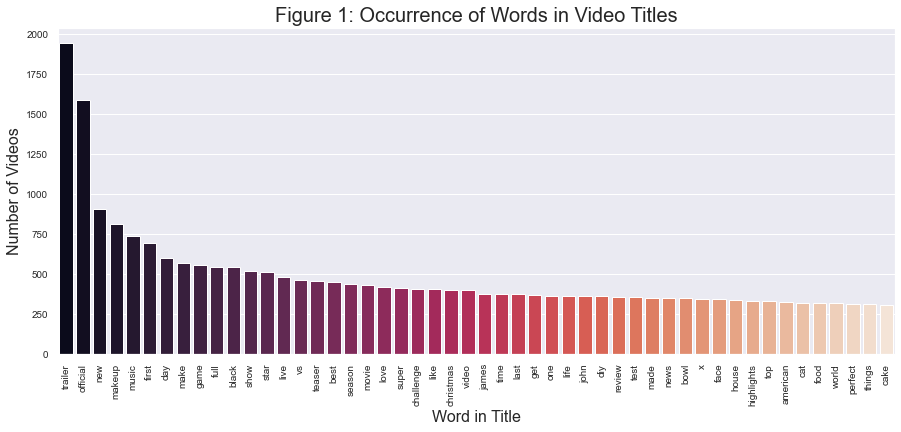

In [38]:
# trailer, official, and new are the top 3 words total
fig= plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.barplot(top_words, freqs, palette="rocket")
sns.set_style("darkgrid")
sns.set(font_scale=1.2)
plt.xlabel('Word in Title', fontsize=16)
plt.ylabel('Number of Videos', fontsize=16)
plt.title('Figure 1: Occurrence of Words in Video Titles', fontsize=20)
plt.show()

### looking into views

Text(0.5, 1.0, 'Figure 7: Views of Trending Videos')

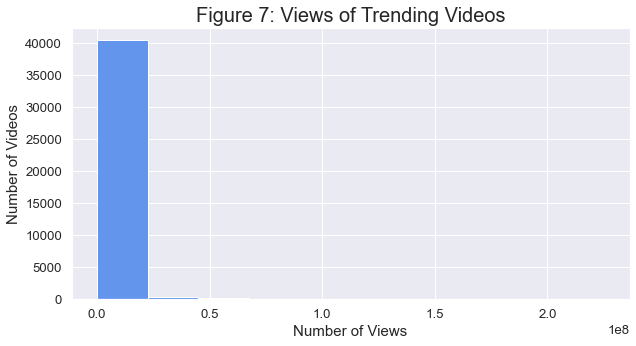

In [39]:
#
plt.figure(figsize=(10,5))
v1 = US_vids['views'].hist(color='cornflowerblue')
plt.xlabel('Number of Views', fontsize=15)
plt.ylabel('Number of Videos', fontsize=15)
plt.title('Figure 7: Views of Trending Videos', fontsize=20)

Text(0.5, 1.0, 'Figure 8: Videos with Fewer than 5 Million Views ')

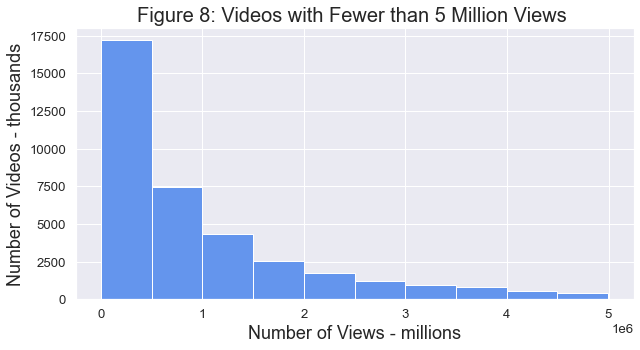

In [40]:
v5million = US_vids[US_vids['views'] < 5e6]['views']

# veiw of all vids under 5 mil views
plt.figure(figsize=(10,5))
v2 = v5million.hist(color='cornflowerblue')
plt.xlabel('Number of Views - millions', fontsize=18)
plt.ylabel('Number of Videos - thousands', fontsize=18)
plt.title('Figure 8: Videos with Fewer than 5 Million Views ', fontsize=20)

In [41]:
#76% of videos have under 1 mil
#60% of vids have under 2 mil
views_2 = US_vids[US_vids['views'] < 2e6]['views'].count() / US_vids['views'].count() * 100
views_1 = US_vids[US_vids['views'] < 1e6]['views'].count() / US_vids['views'].count() * 100

print("percent of videos with under 2 million views: ", views_2)
print("percent of videos with under 1 million views: ", views_1)

percent of videos with under 2 million views:  76.9811228601431
percent of videos with under 1 million views:  60.09426359618062


### Further Cleaning
##### - looking for outliers to exclude/help end model preformance 

In [42]:
US_vids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trending_date      40949 non-null  object 
 1   title              40949 non-null  object 
 2   channel_title      40949 non-null  object 
 3   publish_time       40949 non-null  object 
 4   views              40949 non-null  int64  
 5   likes              40949 non-null  int64  
 6   dislikes           40949 non-null  int64  
 7   comment_count      40949 non-null  int64  
 8   comments_disabled  40949 non-null  object 
 9   ratings_disabled   40949 non-null  object 
 10  Is Successful      40949 non-null  object 
 11  Genre              40949 non-null  object 
 12  tag_list           40949 non-null  object 
 13  Number_of_Tags     40949 non-null  int64  
 14  like_rate          40949 non-null  float64
 15  dislike_rate       40949 non-null  float64
 16  comment_rate       409

In [43]:
#only 633 disabled 

In [44]:
#only 169 disabled

In [45]:
#copying this data set 
NLP=US_vids.copy()

In [46]:
#drop title channel, channel_title, drop comments and ratings disabled inplace= true///get dummies then concat

df=US_vids.drop(['title','channel_title','publish_time','trending_date','title_cl'], axis=1)

In [47]:
#making a categorical df to make binary
cat_df= df[['Is Successful','comments_disabled','ratings_disabled','Genre']]

In [48]:
model_df1 = pd.get_dummies(cat_df)
model_df1

,Is Successful_False,Is Successful_True,comments_disabled_False,comments_disabled_True,ratings_disabled_False,ratings_disabled_True,Genre_Cars & Vehicles,Genre_Comedy,Genre_Education,Genre_Entertainment,...,Genre_How-to & Style,Genre_Music,Genre_News & Politics,Genre_Non-profits & Activism,Genre_People & Blogs,Genre_Pets & Animals,Genre_Science & Technology,Genre_Shows,Genre_Sport,Genre_Travel & Events
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
40945,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40946,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
40947,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df=df.drop(['Is Successful','comments_disabled','ratings_disabled','Genre','tag_list'],axis=1)

In [50]:
joined_df = pd.concat([df, model_df1], axis=1, join='inner')

In [51]:
#transformed_df.info()
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   views                         40949 non-null  int64  
 1   likes                         40949 non-null  int64  
 2   dislikes                      40949 non-null  int64  
 3   comment_count                 40949 non-null  int64  
 4   Number_of_Tags                40949 non-null  int64  
 5   like_rate                     40949 non-null  float64
 6   dislike_rate                  40949 non-null  float64
 7   comment_rate                  40949 non-null  float64
 8   Is Successful_False           40949 non-null  uint8  
 9   Is Successful_True            40949 non-null  uint8  
 10  comments_disabled_False       40949 non-null  uint8  
 11  comments_disabled_True        40949 non-null  uint8  
 12  ratings_disabled_False        40949 non-null  uint8  
 13  r

In [52]:
y=joined_df['Is Successful_True']
X=joined_df.drop(['Is Successful_True','views','Is Successful_False','comment_count','dislikes','likes'], axis=1)

### Modeling prep

In [53]:
#train test split 
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.20, random_state=2022)

In [54]:
#validation train test split 
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.20, random_state=2022, stratify=y_tr)

In [55]:
def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print accuracy score
    print('Training accuracy: ', recall_score(y_train, train_preds))
    print('Validation accuracy: ', recall_score(y_val, val_preds))

    # return fitted model
    return model

### First Model DT

In [56]:
#not the model we will use 
dt = DecisionTreeClassifier(random_state = 2022)

In [57]:
dt = modeling_function(dt, X_train, y_train, X_val, y_val)

Training accuracy:  1.0
Validation accuracy:  0.9253246753246753


### Second Model RF

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

forest = RandomForestClassifier(max_depth=2, random_state=101)
forest.fit(X_train, y_train)


y_forest_pred = forest.predict(X_test)

print('Accuracy of random forest classifier: {:.2f}'.format(forest.score(X_test, y_test)))

Accuracy of random forest classifier: 0.81


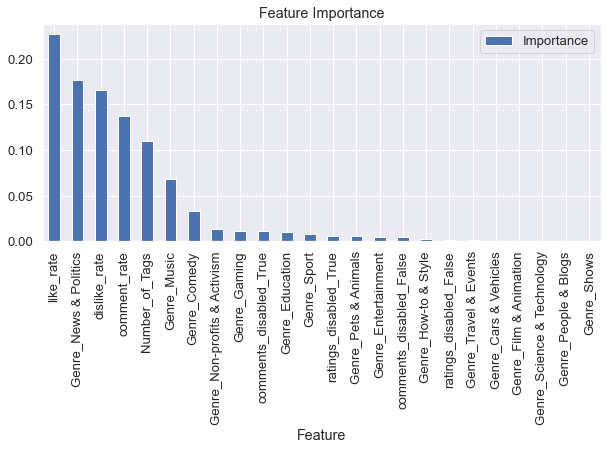

In [59]:
importances = pd.DataFrame({'Feature': X_train.columns,
                            'Importance': forest.feature_importances_}).set_index('Feature').sort_values('Importance',ascending=False)

# plot the importances
importances = importances.plot(kind='bar', figsize=(10,4))
importances = importances.set_title("Feature Importance")
plt.show()

### logreg

In [60]:
logreg = LogisticRegression(penalty='l1', solver='liblinear')

In [61]:
logreg = modeling_function(logreg, X_train, y_train, X_val, y_val)

Training accuracy:  0.9940788845382484
Validation accuracy:  0.9927425515660809


In [62]:
y_scores = cross_val_predict(logreg, X_train, y_train, cv=3,
                             method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

### C matrix

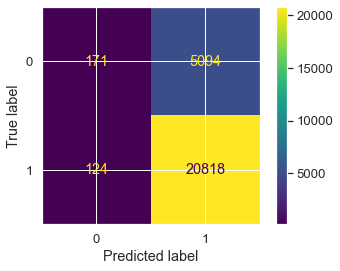

In [63]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_train, y_train)

In [64]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2021)

In [65]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

### logreg2

In [66]:
logreg2 = LogisticRegression(penalty='l1', solver='liblinear')

In [67]:
logreg2.fit(X_train_res, y_train_res)

C:\Users\kindl\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(penalty='l1', solver='liblinear')

In [68]:
logreg2 = modeling_function(logreg2, X_train_res, y_train_res, X_val, y_val)

Training accuracy:  0.6722853595645115
Validation accuracy:  0.6728418640183346


C:\Users\kindl\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


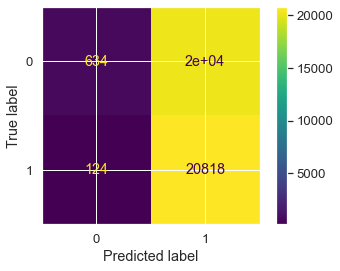

In [69]:
plot_confusion_matrix(logreg, X_train_res, y_train_res)

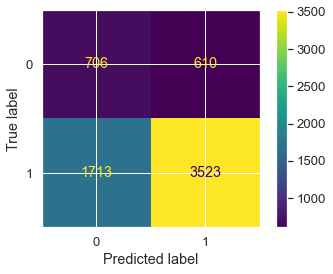

In [70]:
plot_confusion_matrix(logreg2, X_val, y_val)

### XGBOOST to reduce false positives

In [71]:
#
import xgboost as xgb
XGB = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=180, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

XGB.fit(X_train,
           y_train,
           verbose = True, 
           early_stopping_rounds=10,
           eval_metric = "aucpr",
           eval_set = [(X_test, y_test)])


[0]	validation_0-aucpr:0.89324
[1]	validation_0-aucpr:0.89471
[2]	validation_0-aucpr:0.90112
[3]	validation_0-aucpr:0.90242
[4]	validation_0-aucpr:0.91083
[5]	validation_0-aucpr:0.91194
[6]	validation_0-aucpr:0.91538
[7]	validation_0-aucpr:0.91890
[8]	validation_0-aucpr:0.92162
[9]	validation_0-aucpr:0.92405
[10]	validation_0-aucpr:0.92645
[11]	validation_0-aucpr:0.92829
[12]	validation_0-aucpr:0.93008
[13]	validation_0-aucpr:0.93099
[14]	validation_0-aucpr:0.93130
[15]	validation_0-aucpr:0.93166
[16]	validation_0-aucpr:0.93156
[17]	validation_0-aucpr:0.93211
[18]	validation_0-aucpr:0.93236
[19]	validation_0-aucpr:0.93291
[20]	validation_0-aucpr:0.93422
[21]	validation_0-aucpr:0.93466
[22]	validation_0-aucpr:0.93464
[23]	validation_0-aucpr:0.93619
[24]	validation_0-aucpr:0.93644
[25]	validation_0-aucpr:0.93825
[26]	validation_0-aucpr:0.93979
[27]	validation_0-aucpr:0.94050
[28]	validation_0-aucpr:0.94118
[29]	validation_0-aucpr:0.94123
[30]	validation_0-aucpr:0.94147
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=1,
              monotone_constraints='()', n_estimators=180, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [72]:
XGB = modeling_function(XGB, X_train_res, y_train_res, X_val, y_val)

[10:13:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy:  0.9388788081367586
Validation accuracy:  0.8877005347593583


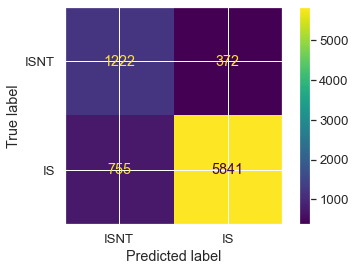

In [73]:
plot_confusion_matrix(XGB,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['ISNT', 'IS'])

### ...Maybe do a few more models with some frid searches 

### Genres(A&F) -- Titles and Tags 

In [74]:
NLP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trending_date      40949 non-null  object 
 1   title              40949 non-null  object 
 2   channel_title      40949 non-null  object 
 3   publish_time       40949 non-null  object 
 4   views              40949 non-null  int64  
 5   likes              40949 non-null  int64  
 6   dislikes           40949 non-null  int64  
 7   comment_count      40949 non-null  int64  
 8   comments_disabled  40949 non-null  object 
 9   ratings_disabled   40949 non-null  object 
 10  Is Successful      40949 non-null  object 
 11  Genre              40949 non-null  object 
 12  tag_list           40949 non-null  object 
 13  Number_of_Tags     40949 non-null  int64  
 14  like_rate          40949 non-null  float64
 15  dislike_rate       40949 non-null  float64
 16  comment_rate       409

In [75]:
NLP_df=NLP.drop(['Is Successful','comments_disabled','ratings_disabled','title'],axis=1)

In [76]:
joined_df2 = pd.concat([NLP_df,model_df1], axis=1, join='inner')
joined_df2

,trending_date,channel_title,publish_time,views,likes,dislikes,comment_count,Genre,tag_list,Number_of_Tags,...,Genre_How-to & Style,Genre_Music,Genre_News & Politics,Genre_Non-profits & Activism,Genre_People & Blogs,Genre_Pets & Animals,Genre_Science & Technology,Genre_Shows,Genre_Sport,Genre_Travel & Events
0,2017-11-14,CaseyNeistat,2017-11-13,748374,57527,2966,15954,People & Blogs,[SHANtell martin],1,...,0,0,0,0,1,0,0,0,0,0
1,2017-11-14,LastWeekTonight,2017-11-13,2418783,97185,6146,12703,Entertainment,"[last week tonight trump presidency, ""last wee...",4,...,0,0,0,0,0,0,0,0,0,0
2,2017-11-14,Rudy Mancuso,2017-11-12,3191434,146033,5339,8181,Comedy,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""...",23,...,0,0,0,0,0,0,0,0,0,0
3,2017-11-14,Good Mythical Morning,2017-11-13,343168,10172,666,2146,Entertainment,"[rhett and link, ""gmm"", ""good mythical morning...",27,...,0,0,0,0,0,0,0,0,0,0
4,2017-11-14,nigahiga,2017-11-12,2095731,132235,1989,17518,Entertainment,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y...",14,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,2018-06-14,AaronsAnimals,2018-05-18,1685609,38160,1385,2657,Pets & Animals,"[aarons animals, ""aarons"", ""animals"", ""cat"", ""...",14,...,0,0,0,0,0,1,0,0,0,0
40945,2018-06-14,zefrank1,2018-05-18,1064798,60008,382,3936,People & Blogs,[[none]],1,...,0,0,0,0,1,0,0,0,0,0
40946,2018-06-14,Brad Mondo,2018-05-18,1066451,48068,1032,3992,Entertainment,[I gave safiya nygaard a perfect hair makeover...,24,...,0,0,0,0,0,0,0,0,0,0
40947,2018-06-14,How It Should Have Ended,2018-05-17,5660813,192957,2846,13088,Film & Animation,"[Black Panther, ""HISHE"", ""Marvel"", ""Infinity W...",22,...,0,0,0,0,0,0,0,0,0,0


In [77]:
NLP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trending_date      40949 non-null  object 
 1   title              40949 non-null  object 
 2   channel_title      40949 non-null  object 
 3   publish_time       40949 non-null  object 
 4   views              40949 non-null  int64  
 5   likes              40949 non-null  int64  
 6   dislikes           40949 non-null  int64  
 7   comment_count      40949 non-null  int64  
 8   comments_disabled  40949 non-null  object 
 9   ratings_disabled   40949 non-null  object 
 10  Is Successful      40949 non-null  object 
 11  Genre              40949 non-null  object 
 12  tag_list           40949 non-null  object 
 13  Number_of_Tags     40949 non-null  int64  
 14  like_rate          40949 non-null  float64
 15  dislike_rate       40949 non-null  float64
 16  comment_rate       409

In [78]:
NLP['Genre']=NLP['Genre'].astype(object)

In [79]:
NLP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trending_date      40949 non-null  object 
 1   title              40949 non-null  object 
 2   channel_title      40949 non-null  object 
 3   publish_time       40949 non-null  object 
 4   views              40949 non-null  int64  
 5   likes              40949 non-null  int64  
 6   dislikes           40949 non-null  int64  
 7   comment_count      40949 non-null  int64  
 8   comments_disabled  40949 non-null  object 
 9   ratings_disabled   40949 non-null  object 
 10  Is Successful      40949 non-null  object 
 11  Genre              40949 non-null  object 
 12  tag_list           40949 non-null  object 
 13  Number_of_Tags     40949 non-null  int64  
 14  like_rate          40949 non-null  float64
 15  dislike_rate       40949 non-null  float64
 16  comment_rate       409

In [80]:
#remember these dataframes
nlp_2=NLP[['Genre','tag_list','title_cl','Number_of_Tags','title','Is Successful','views']]

In [81]:
nlp_2['tag_list'] = nlp_2['tag_list'].astype('str')

<ipython-input-81-6af19174bd5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp_2['tag_list'] = nlp_2['tag_list'].astype('str')


In [82]:
nlp_3=NLP[['Genre','views','likes','dislikes','comment_count','Is Successful']]

In [83]:
nlp_4=NLP[['trending_date','publish_time','views','likes','dislikes','comment_count']]

### functions/graphs for finding popular words for titles/tags

In [84]:
#fuction for top words 
def top_words_of_category(category, figure_name, k=5):
   
    nlp_22 = nlp_2[nlp_2['Genre'] == category]
    cnt_c = Counter()
    
    for title in nlp_22['title_cl']:
        for token in title.split():
            cnt_c[token] += 1

    dist_c = cnt_c.most_common(k)
    top_words_c = []
    freqs_c = []
    
    for word, freq in dist_c:
        top_words_c.append(word)
        freqs_c.append(freq)

        
        
    fig= plt.figure(figsize=(8,6))
    plt.xticks(rotation=90)
    plt.bar(top_words_c, freqs_c, color='skyblue')
    plt.title(figure_name, fontsize=20)
    plt.xlabel('Keyword', fontsize=17)
    plt.ylabel('Video Titles', fontsize=17)

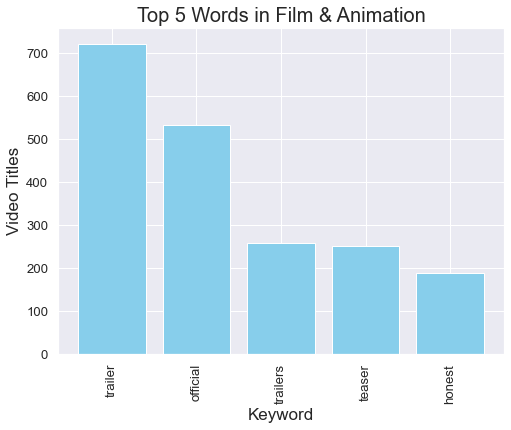

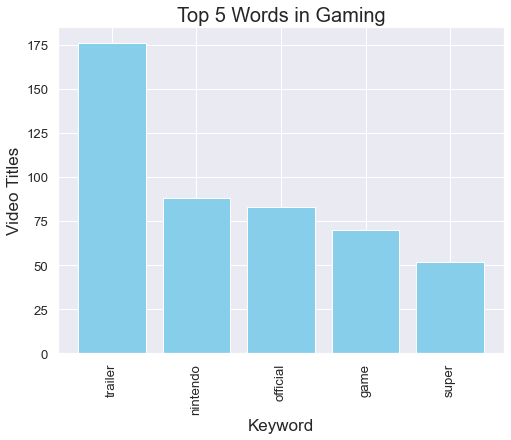

In [85]:
#top 5 words per category
top_words_of_category('Film & Animation', 'Top 5 Words in Film & Animation')
top_words_of_category('Gaming', 'Top 5 Words in Gaming')

In [86]:
# finding titlewords function 
def views_dist_exclude(keywords, excl, category):
    # Inputs:
    #      keywords - word(s) the title must include
    #      excl - word(s) the title must exclude
    #      category - from which the titles are from
    dist = []
    df_cate = nlp_2[nlp_2['Genre'] == category]
    for _, row in df_cate.iterrows():
        title_tokens = set(row['title_cl'].split())
        if excl.issubset(title_tokens):
            continue
        if keywords.issubset(title_tokens):
            dist.append(row['views'])
    return dist

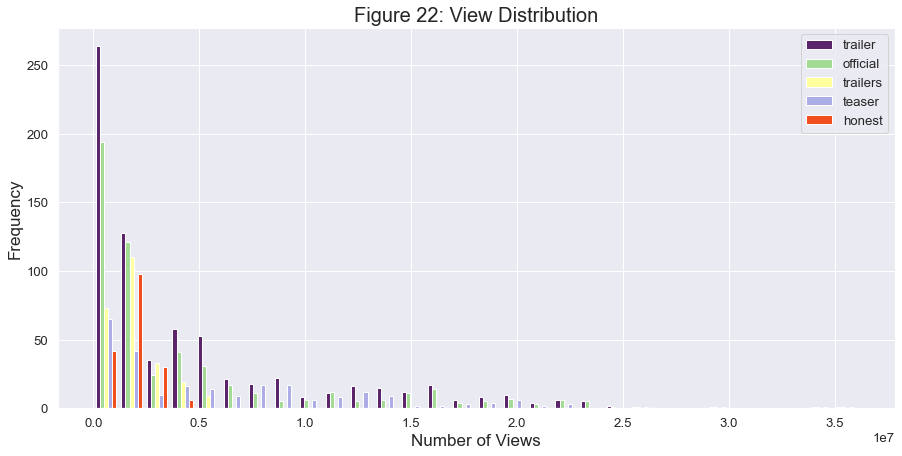

In [87]:
# veiwing distrobution of title words by views 
d_trailer = views_dist_exclude({'trailer'}, {'official', 'trailers','teaser','honest'}, 'Film & Animation')
d_official = views_dist_exclude({'official'}, {'trailer', 'trailers','teaser','honest'}, 'Film & Animation')
d_trailers = views_dist_exclude({'trailers'}, {'trailer', 'official','teaser','honest'}, 'Film & Animation')
d_teaser = views_dist_exclude({'teaser'}, {'trailer', 'official','trailers','honest'}, 'Film & Animation')
d_honest = views_dist_exclude({'honest'}, {'trailer', 'official','trailers','teaser'}, 'Film & Animation')
# Histogram for array of keywords
fig= plt.figure(figsize=(15,7))
plt.hist([d_trailer,d_official,d_trailers,d_teaser,d_honest], label=['trailer', 'official','trailers','teaser','honest'], 
         color = ['#5c246b', '#a3db94', '#ffff9f','#acace6','#f04e1f'], bins=30)
plt.legend(loc='upper right')
plt.title('Figure 22: View Distribution', fontsize=20)
plt.xlabel('Number of Views', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.show()

In [88]:
#top 5 words for tags 
def top_words_of_tags(category, figure_name, k=5):
   
    nlp_33 = nlp_2[nlp_2['Genre'] == category]
    cnt_c2 = Counter()
    
    for title in nlp_33['tag_list']:
        for token in title.split():
            cnt_c2[token] += 1

    dist_c2 = cnt_c2.most_common(k)
    top_words_c2 = []
    freqs_c2 = []
    
    for word, freq in dist_c2:
        top_words_c2.append(word)
        freqs_c2.append(freq)

        
        
    fig= plt.figure(figsize=(8,6))
    plt.xticks(rotation=90)
    plt.bar(top_words_c2, freqs_c2, color='skyblue')
    plt.title(figure_name, fontsize=20)
    plt.xlabel('Keyword', fontsize=17)
    plt.ylabel('Video Tags', fontsize=17)

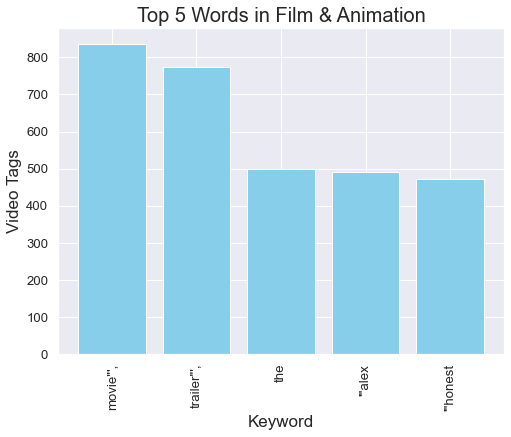

In [89]:
# visualizing top 5 
top_words_of_tags('Film & Animation', 'Top 5 Words in Film & Animation')

### ---